# [作業目標]
- 請同學試著查詢 pandas.cut 這個函數還有哪些參數, 藉由改動參數以達成目標
- 藉由查詢與改動參數的過程, 熟悉查詢函數的方法與理解參數性質, 並了解數值的離散化的調整工具

# [作業重點]
- 仿照 In[3], In[4] 的語法, 並設定 pd.cut 的參數以指定間距

In [2]:
# 載入套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 初始設定 Ages 的資料
ages = pd.DataFrame({"age": [18,22,25,27,7,21,23,37,30,61,45,41,9,18,80,100]})

#### 等寬劃分

In [4]:
# 新增欄位 "equal_width_age", 對年齡做等寬劃分
ages["equal_width_age"] = pd.cut(ages["age"], 4)

In [5]:
# 觀察等寬劃分下, 每個種組距各出現幾次
ages["equal_width_age"].value_counts() # 每個 bin 的值的範圍大小都是一樣的

(6.907, 30.25]    10
(30.25, 53.5]      3
(76.75, 100.0]     2
(53.5, 76.75]      1
Name: equal_width_age, dtype: int64

#### 等頻劃分

In [6]:
# 新增欄位 "equal_freq_age", 對年齡做等頻劃分
ages["equal_freq_age"] = pd.qcut(ages["age"], 4)

In [7]:
# 觀察等頻劃分下, 每個種組距各出現幾次
ages["equal_freq_age"].value_counts() # 每個 bin 的資料筆數是一樣的

(6.999, 20.25]    4
(20.25, 26.0]     4
(26.0, 42.0]      4
(42.0, 100.0]     4
Name: equal_freq_age, dtype: int64

# 作業
- 新增一個欄位 `customized_age_grp`，把 `age` 分為 (0, 10], (10, 20], (20, 30], (30, 50], (50, 100] 這五組，
'(' 表示不包含, ']' 表示包含  
- Hints: 執行 ??pd.cut()，了解提供其中 bins 這個參數的使用方式

In [8]:
# 新增欄位 "customized_age_grp", 指定區間為 [0, 10, 20, 30, 50, 100] 做劃分
ages["customized_age_grp"] = pd.cut(ages["age"], [0, 10, 20, 30, 50, 100])

In [9]:
# 觀察指定區間的劃分, 以及範例中兩者劃分, 與原始數值 age 的關係
ages

,age,equal_width_age,equal_freq_age,customized_age_grp
0,18,"(6.907, 30.25]","(6.999, 20.25]","(10, 20]"
1,22,"(6.907, 30.25]","(20.25, 26.0]","(20, 30]"
2,25,"(6.907, 30.25]","(20.25, 26.0]","(20, 30]"
3,27,"(6.907, 30.25]","(26.0, 42.0]","(20, 30]"
4,7,"(6.907, 30.25]","(6.999, 20.25]","(0, 10]"
5,21,"(6.907, 30.25]","(20.25, 26.0]","(20, 30]"
6,23,"(6.907, 30.25]","(20.25, 26.0]","(20, 30]"
7,37,"(30.25, 53.5]","(26.0, 42.0]","(30, 50]"
8,30,"(6.907, 30.25]","(26.0, 42.0]","(20, 30]"
9,61,"(53.5, 76.75]","(42.0, 100.0]","(50, 100]"


<AxesSubplot:>

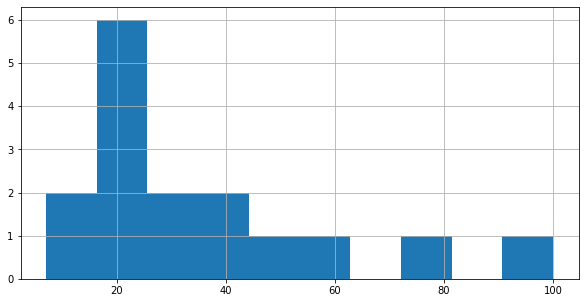

In [11]:
plt.figure(figsize=(10,5))
ages['age'].hist(bins=10)